In [1]:
reviews <- read.csv("reviews.csv")

In [2]:
head(reviews)

review_id,user_id,business_id,stars,date,useful,funny,cool,type
NxL8SIC5yqOdnlXCg18IBg,KpkOkG6RIf4Ra25Lhhxf1A,2aFiy99vNLklCx3T_tGS9A,5,2011-10-10,0,0,0,review
pXbbIgOXvLuTi_SPs1hQEQ,bQ7fQq1otn9hKX-gXRsrgA,2aFiy99vNLklCx3T_tGS9A,5,2010-12-29,1,0,0,review
wslW2Lu4NYylb1jEapAGsw,r1NUhdNmL6yU9Bn-Yx6FTw,2aFiy99vNLklCx3T_tGS9A,5,2011-04-29,0,0,0,review
GP6YEearUWrzPtQYSF1vVg,aW3ix1KNZAvoM8q-WghA3Q,2LfIuF3_sX6uwe-IR-P0jQ,5,2014-07-14,0,0,1,review
25RlYGq2s5qShi-pn3ufVA,YOo-Cip8HqvKp_p9nEGphw,2LfIuF3_sX6uwe-IR-P0jQ,4,2014-01-15,0,0,0,review
Uf1Ki1yyH_JDKhLvn2e4FQ,bgl3j8yJcRO-00NkUYsXGQ,2LfIuF3_sX6uwe-IR-P0jQ,5,2013-04-28,2,0,1,review


In [3]:
summary(reviews)

                  review_id                    user_id  
 -6wjE08Pf8oWrZQQocEgHg: 1   1-xPzJk_ijBvY2J8Re1DIQ: 1  
 -K5z7DzXHJgEC1tsTLfFeA: 1   29rUYREQxeFE6LWGnirgew: 1  
 _a7Zu2ZSEGO4bl2gvu7OtQ: 1   2N9wrn5A37aOXDrBPIYQdA: 1  
 0-emituHrxFvtYJZVhr2tA: 1   57w8gLY3f7OwGmWNtUIFIA: 1  
 25RlYGq2s5qShi-pn3ufVA: 1   5NDk-q5mv8PIDvz83HwMVg: 1  
 2tjghSImOPf4A9L4zhByRQ: 1   7LCG3o2KW2jgKgbKN0DQOg: 1  
 (Other)               :52   (Other)               :52  
                 business_id     stars               date        useful     
 0czfEgv9KAD4VlIa7ANPWQ:10   Min.   :1.000   2014-08-23: 2   Min.   :0.000  
 2aFiy99vNLklCx3T_tGS9A: 3   1st Qu.:3.000   2007-03-04: 1   1st Qu.:0.000  
 2LfIuF3_sX6uwe-IR-P0jQ:15   Median :4.000   2007-12-15: 1   Median :0.000  
 4P-vTvE6cncJyUyLh73pxw:23   Mean   :3.569   2009-01-30: 1   Mean   :0.931  
 4uiijOUDzc-DeIb2XcKW_A: 4   3rd Qu.:5.000   2009-02-01: 1   3rd Qu.:1.000  
 7GI_V9oLCUGdn2ogqB0IBg: 3   Max.   :5.000   2009-04-10: 1   Max.   :7.000  
     

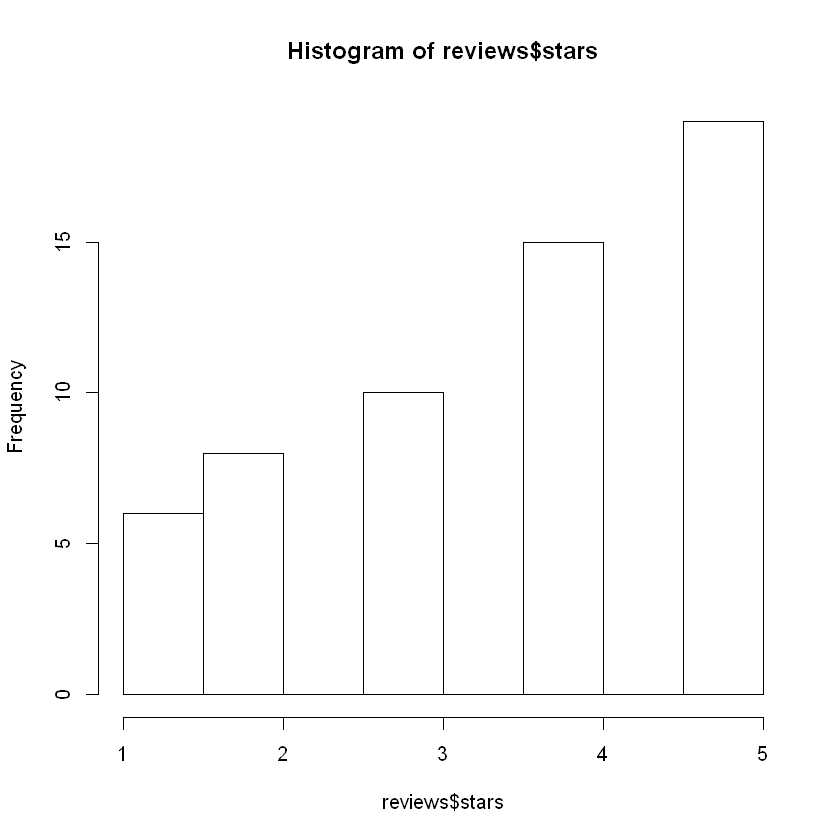

In [4]:
hist(reviews$stars)

In [7]:
install.packages("sqldf", repos='http://cran.us.r-project.org')
library(sqldf)
five_stars = sqldf("select business_id, count(*) from reviews where stars =
5 group by business_id order by 2 desc")
head(five_stars)

Warning message:
"package 'sqldf' is in use and will not be installed"

business_id,count(*)
2LfIuF3_sX6uwe-IR-P0jQ,9
2aFiy99vNLklCx3T_tGS9A,3
4P-vTvE6cncJyUyLh73pxw,3
0czfEgv9KAD4VlIa7ANPWQ,2
7GI_V9oLCUGdn2ogqB0IBg,2


In [10]:
library(sqldf)
most_ratings = sqldf("select business_id, count(*) from reviews group by
business_id order by 2 desc")
head(most_ratings)

business_id,count(*)
4P-vTvE6cncJyUyLh73pxw,23
2LfIuF3_sX6uwe-IR-P0jQ,15
0czfEgv9KAD4VlIa7ANPWQ,10
4uiijOUDzc-DeIb2XcKW_A,4
2aFiy99vNLklCx3T_tGS9A,3
7GI_V9oLCUGdn2ogqB0IBg,3


In [12]:
library(sqldf)
reviews_stars = sqldf("select stars,count(*) as reviews from reviews group
by stars")
reviews_stars
cor(reviews_stars)

stars,reviews
1,6
2,8
3,10
4,15
5,19


,stars,reviews
stars,1.0000000,0.9808232
reviews,0.9808232,1.0000000


business_id,rating
2aFiy99vNLklCx3T_tGS9A,5.000000
2LfIuF3_sX6uwe-IR-P0jQ,4.200000
7GI_V9oLCUGdn2ogqB0IBg,3.666667
4P-vTvE6cncJyUyLh73pxw,3.304348
0czfEgv9KAD4VlIa7ANPWQ,3.000000
4uiijOUDzc-DeIb2XcKW_A,3.000000


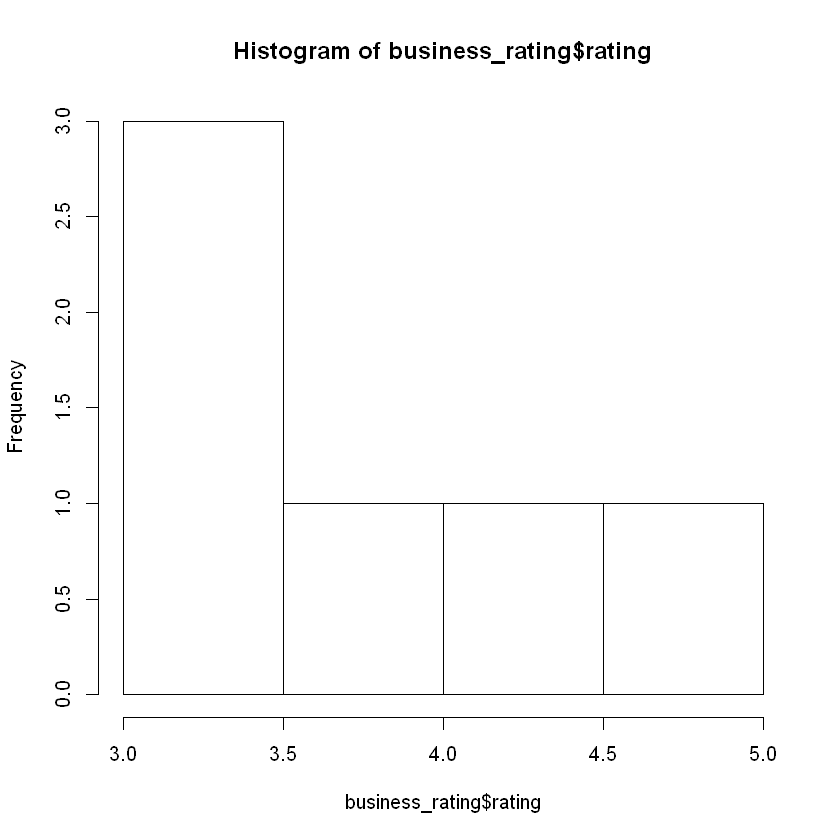

In [13]:
library(sqldf)
business_rating = sqldf("select business_id, avg(stars) as rating from
reviews group by business_id order by 2 desc")
head(business_rating)
hist(business_rating$rating)

In [14]:
model <- lm(stars ~ funny + useful + cool, data=reviews)
summary(model)


Call:
lm(formula = stars ~ funny + useful + cool, data = reviews)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6852 -0.7589  0.3148  1.2333  2.0299 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.6852     0.2121  17.375   <2e-16 ***
funny        -0.3732     0.2691  -1.387   0.1712    
useful       -0.3419     0.2457  -1.391   0.1698    
cool          0.7888     0.3288   2.399   0.0199 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.305 on 54 degrees of freedom
Multiple R-squared:  0.1171,	Adjusted R-squared:  0.06801 
F-statistic: 2.386 on 3 and 54 DF,  p-value: 0.07911
